In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from hmmlearn import hmm
import numpy as np

In [2]:
N_regimes = 3
start_time = None

In [3]:
kor = pd.read_csv('Composite leading indicator_kor.csv', index_col=0, parse_dates=True ) #인덱스 불러오기
usa = pd.read_csv('Composite leading indicator.csv', index_col=0, parse_dates=True )
kororign = pd.read_csv('Composite leading indicator_kor.csv', index_col=0, parse_dates=True ) 

In [4]:
#normalize
kor['value'] =( kor['value'] - kor['value'].mean() ) / kor['value'].std()
usa['value'] =( usa['value'] - usa['value'].mean() ) / usa['value'].std()


In [5]:
#Korea 부터

In [6]:
#kor_model = sm.tsa.MarkovRegression(kor.dropna(), k_regimes=N_regimes, trend='nc', switching_variance=True)
kor_model = sm.tsa.MarkovRegression(kor.dropna(),
                                    k_regimes=N_regimes, trend='ct', switching_trend=True, switching_variance=True)
kor_model_fit = kor_model.fit()
#kor_model_fit.summary()



C:\Users\owjet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\owjet\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
#for i in range(N_regimes):
#    plt.subplot(N_regimes, 1, i+1)                # nrows=2, ncols=1, 
#    kor_model_fit.smoothed_marginal_probabilities[i].plot(title='Korea Regime {}.'.format(i), figsize=(18, 18))
#    kor.plot(title='Korea Leading indicator', figsize=(18, 5)) 

In [8]:
model2 = hmm.GaussianHMM(n_components=3, n_iter=1000).fit(kor.dropna())
model2.decode(kor.dropna())[1]

array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [9]:
indexdf = pd.DataFrame(kor.index)
preddftemp = pd.DataFrame([model2.decode(kor.dropna())[1]])

preddftemp=preddftemp.T
preddftempfin=pd.concat([preddftemp, indexdf], axis=1)
preddftempfin = preddftempfin.set_index('time')
preddftempfin


,0
time,
1990-01-01,2
1990-02-01,2
1990-03-01,2
1990-04-01,2
1990-05-01,2
...,...
2022-02-01,2
2022-03-01,2
2022-04-01,0


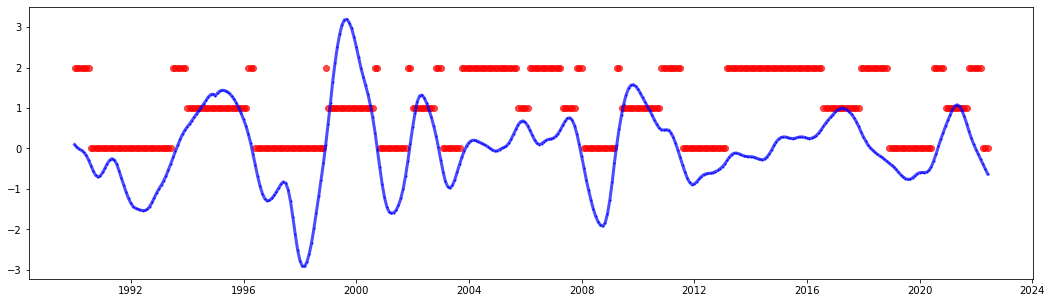

In [10]:
plt.figure(figsize=(18,5))
plt.plot(kor.index, kor['value'], '-s', color='blue', markersize=1, linewidth=3, alpha=0.7)
plt.scatter(kor.index, preddftempfin, alpha=0.7, linewidth=1, color='red')
plt.show()

In [11]:

copykororign=pd.read_csv('Composite leading indicator_kor.csv', index_col=0, parse_dates=True ) 

In [12]:
model_originstock = hmm.GaussianHMM(n_components=2, n_iter=1000, covariance_type="full").fit(kororign.dropna())
#must be one of ‘spherical’, ‘tied’, ‘diag’, ‘ full’.
model_originstock.decode(kororign.dropna())[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

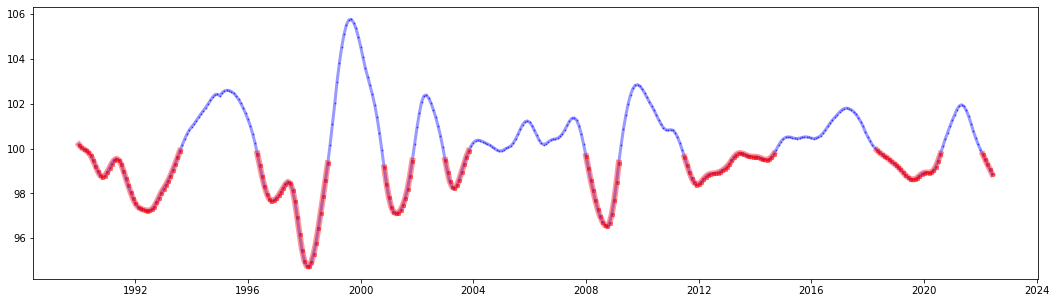

In [13]:
indexdf_o = pd.DataFrame(kororign.index)
preddftemp_o = pd.DataFrame([model_originstock.decode(kororign.dropna())[1]])

preddftemp_o=preddftemp_o.T
preddftempfin_o=pd.concat([preddftemp_o, indexdf], axis=1)
preddftempfin_o = preddftempfin_o.set_index('time')

for i in range(len(kor.index)):
    if preddftempfin_o.iloc[i, 0] == 1:
        kororign.iloc[i, 0] = np.nan
        
plt.figure(figsize=(18,5))
plt.plot(kor.index, copykororign['value'], '-s', color='blue', markersize=1, linewidth=3, alpha=0.4)
plt.plot(kor.index, kororign['value'], '-s', color='r', markersize=3, linewidth=6, alpha=0.4)

plt.show()